<a href="https://colab.research.google.com/github/a1xsa/machine_learning/blob/main/first_move.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import os


# **Анализ датасета**

# 1. Загружаем данные


Загружаем файл из репоизтория Git:


In [2]:
url = "https://raw.githubusercontent.com/a1xsa/machine_learning/main/cardio_train.csv"
data_raw = pd.read_csv(url,sep=';')

Таблица содержит данные о реультатах осмотра 70 тысяч пациентов. Для каждого пациента указаны его возраст, рост, вес, пол, артериальное давление, результаты анализа крови, отношение к курению, алкоголю и физ. активности, а также начиличие сердечно-сосудистых заболеваний.


In [3]:
data_raw.shape

(70000, 13)

In [4]:
data_raw.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Мы видим что столбцы(признаки) имеют имена:
- `age` - возраст (в днях)
- `gender` - пол  (1-ж, 2-м)
- `height` - рост (см)
- `weight` - вес (кг)
- `ap_hi` - верхнее давление
- `ap_lo` - нижнее давление
- `cholesterol` - холестерин(1-нормально, 2-выше нормально, 3-значительно выше нормы)
- `gluc` - глюкоза (1-нормально, 2-выше нормы, 3-значительно выше нормы)
- `smoke` - курение (1-курит, 0-нет)
- `alco` - алкоголь (1-пьет, 0-нет)
- `active` - отношение к спорту (1-занимается, 0-нет)
- `cardio` - целевой признак (1-есть заболевание, 0-здоров)


Признаки `gender`, `cholesterol`, `gluc` -категориальные, `smoke`, `alco`, `active`, `cardio` - бинарные, остальные признаки - количественные (числовые).


Информация о признаках:


In [6]:
data_raw.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Приведу бинарные и категориальные признаки к типу category:


In [7]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['cholesterol'] = data_raw['cholesterol'].astype('category')
data_raw['gluc'] = data_raw['gluc'].astype('category')
data_raw['smoke'] = data_raw['smoke'].astype('category')
data_raw['alco'] = data_raw['alco'].astype('category')
data_raw['active'] = data_raw['active'].astype('category')
data_raw['cardio'] = data_raw['cardio'].astype('category')





In [8]:
data_raw['gender'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  category
 10  alco         70000 non-null  category
 11  active       70000 non-null  category
 12  cardio       70000 non-null  category
dtypes: category(7), float64(1), int64(5)
memory usage: 3.7 MB


Выведу информацию о числовых признаках:

In [10]:
data_raw.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Информация о категориальных признаках:

In [11]:
data_raw.describe(include=['category'])

,gender,cholesterol,gluc,smoke,alco,active,cardio
count,70000,70000,70000,70000,70000,70000,70000
unique,2,3,3,2,2,2,2
top,1,1,1,0,0,1,0
freq,45530,52385,59479,63831,66236,56261,35021


## Пропущенные значения:

In [12]:
data_raw.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Как видно, пропущенных значений нет.

## Визуализация, анализ:


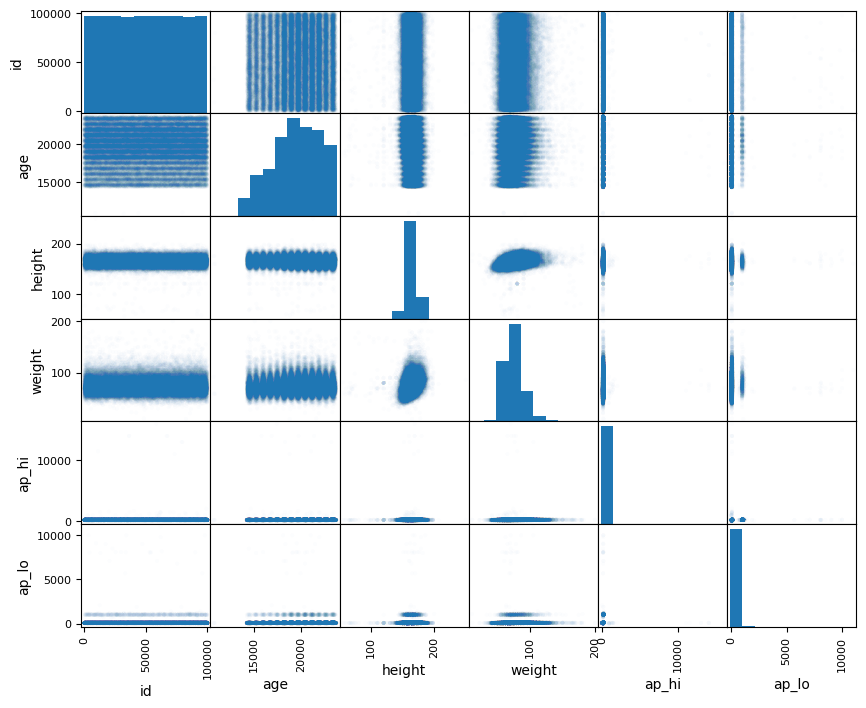

In [13]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8),alpha=.01)
pass

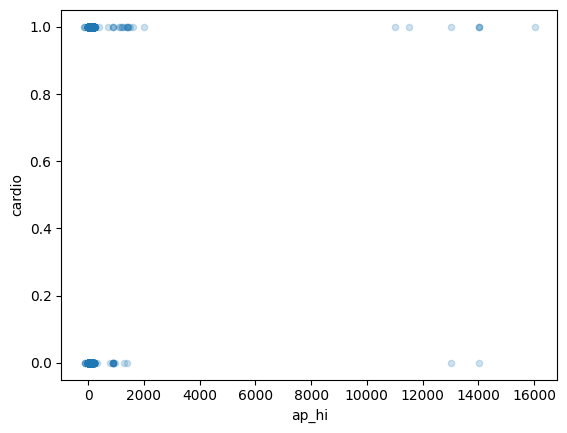

In [14]:
data_raw.plot(kind='scatter', x='ap_hi', y='cardio',alpha=.21)
pass

Можем видеть, что есть значения давления(ap_hi) невообразимые для человека. Возможно дописан лишний 0. Как видно ниже, таких данных не очень много, можно их отбросить.


In [15]:
data_raw[data_raw['ap_hi'] > 250].count()

id             40
age            40
gender         40
height         40
weight         40
ap_hi          40
ap_lo          40
cholesterol    40
gluc           40
smoke          40
alco           40
active         40
cardio         40
dtype: int64

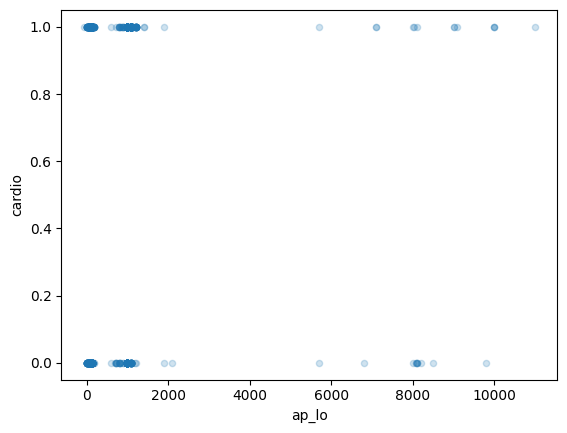

In [16]:
data_raw.plot(kind='scatter', x='ap_lo', y='cardio', alpha=.21)
pass

Аналогичная проблема. С такими выбросами нужно бороться, для этого будем использовать квантили.


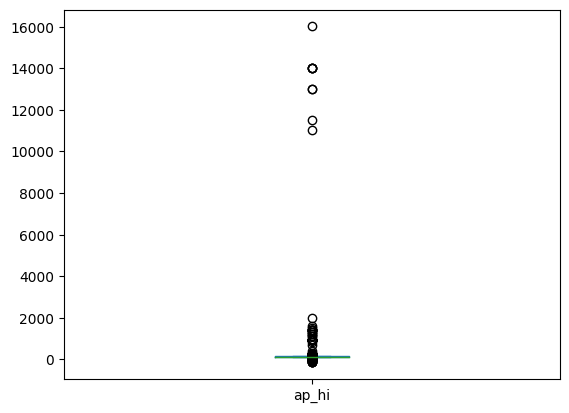

In [17]:
data_raw['ap_hi'].plot(kind='box')
pass

In [18]:
data_raw['ap_hi'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995,.999])

0.005     90.0
0.010     90.0
0.050    100.0
0.100    110.0
0.500    120.0
0.900    150.0
0.950    160.0
0.990    180.0
0.995    190.0
0.999    220.0
Name: ap_hi, dtype: float64

Мы видим что $99\%$ всех значений признака 'ap_hi' находятся в диапазоне от 90.0 до 220.0. Удаляем все строки которые находятся за пределами квантилей.

In [19]:

rows_to_drop = data_raw[
    (data_raw['ap_hi'] < data_raw['ap_hi'].quantile(0.01)) | (data_raw['ap_hi'] > data_raw['ap_hi'].quantile(0.999))].index
data = data_raw.drop(rows_to_drop)
data.shape


(69631, 13)

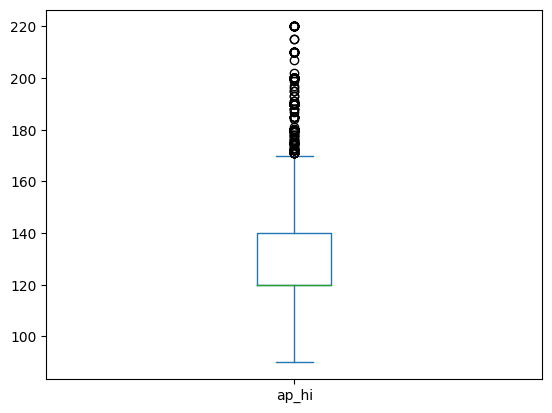

In [20]:
data['ap_hi'].plot(kind='box')
pass

Аналогично делаем с ap_lo:


In [21]:
data['ap_lo'].quantile([0.005,.01,.05,.1,.5,.9,.95,.985,.99,.995,.999])

0.005      60.0
0.010      60.0
0.050      70.0
0.100      70.0
0.500      80.0
0.900      90.0
0.950     100.0
0.985     120.0
0.990    1000.0
0.995    1000.0
0.999    1110.0
Name: ap_lo, dtype: float64

In [22]:

rows_to_drop = data[
    (data['ap_lo'] < data['ap_lo'].quantile(0.005)) | (data['ap_lo'] > data['ap_lo'].quantile(0.985))].index
data = data.drop(rows_to_drop)
data.shape

(68452, 13)

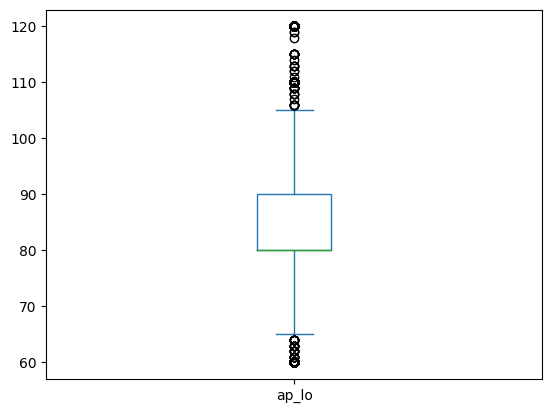

In [23]:
data['ap_lo'].plot(kind='box')
pass

Посмотрим наличие выбросов по данным роста, веса и возраста:


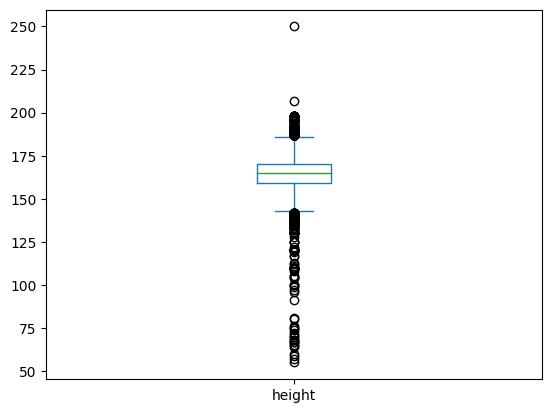

In [24]:
data['height'].plot(kind='box')
pass

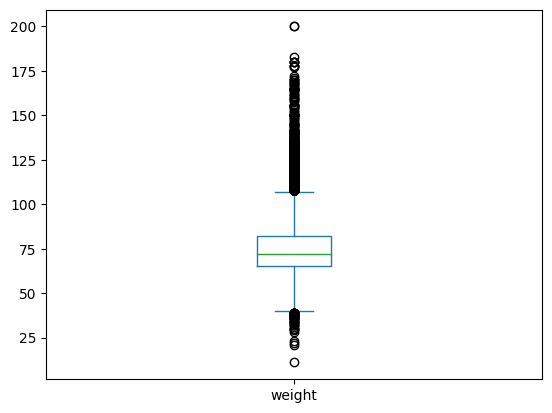

In [25]:
data['weight'].plot(kind='box')
pass

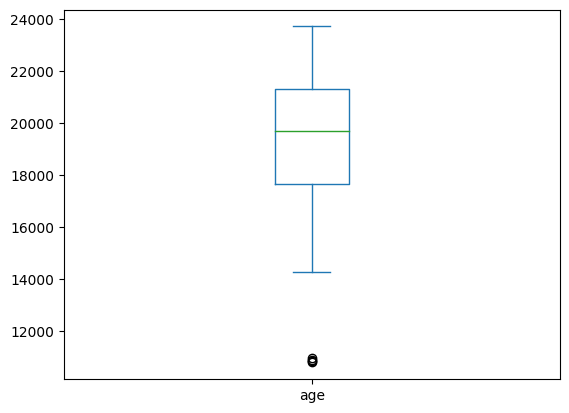

In [26]:
data['age'].plot(kind='box')
pass

In [27]:
data['height'].quantile([0.001,.01,.05,.1,.5,.9,.95,.985,.99,.995,.999])

0.001    120.0
0.010    147.0
0.050    152.0
0.100    155.0
0.500    165.0
0.900    175.0
0.950    178.0
0.985    182.0
0.990    184.0
0.995    186.0
0.999    190.0
Name: height, dtype: float64

In [28]:
data['weight'].quantile([0.001,.01,.05,.1,.5,.9,.95,.985,.99,.995,.999])

0.001     40.000
0.010     48.000
0.050     55.000
0.100     58.000
0.500     72.000
0.900     93.000
0.950    100.000
0.985    112.000
0.990    117.000
0.995    125.000
0.999    148.549
Name: weight, dtype: float64

In [29]:
data['age'].quantile([0.001,.01,.05,.1,.5,.9,.95,.985,.99,.995,.999])

0.001    14327.451
0.010    14466.000
0.050    15058.000
0.100    15838.100
0.500    19702.000
0.900    22638.000
0.950    23257.000
0.985    23447.000
0.990    23488.000
0.995    23542.745
0.999    23625.549
Name: age, dtype: float64

In [30]:
rows_to_drop = data[
    (data['height'] < data['height'].quantile(0.001)) | (data['height'] > data['height'].quantile(0.999)) |
    (data['weight']  < data['weight' ].quantile(0.001)) | (data['weight']  > data['weight'].quantile(0.999))
    | (data['age']  < data['age' ].quantile(0.001))
    ].index
data = data.drop(rows_to_drop)
data.shape

(68162, 13)

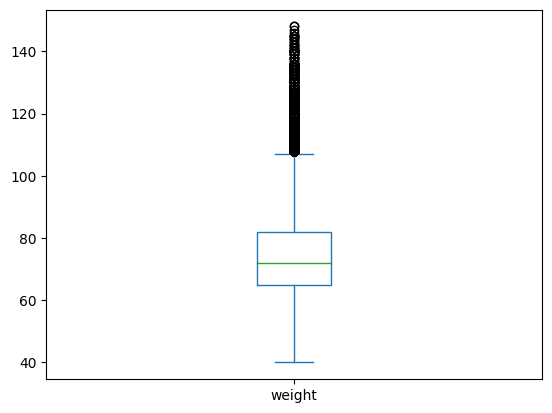

In [31]:
data['weight'].plot(kind='box')
pass

Построим теперь всевозможные диаграммы рассеивания:

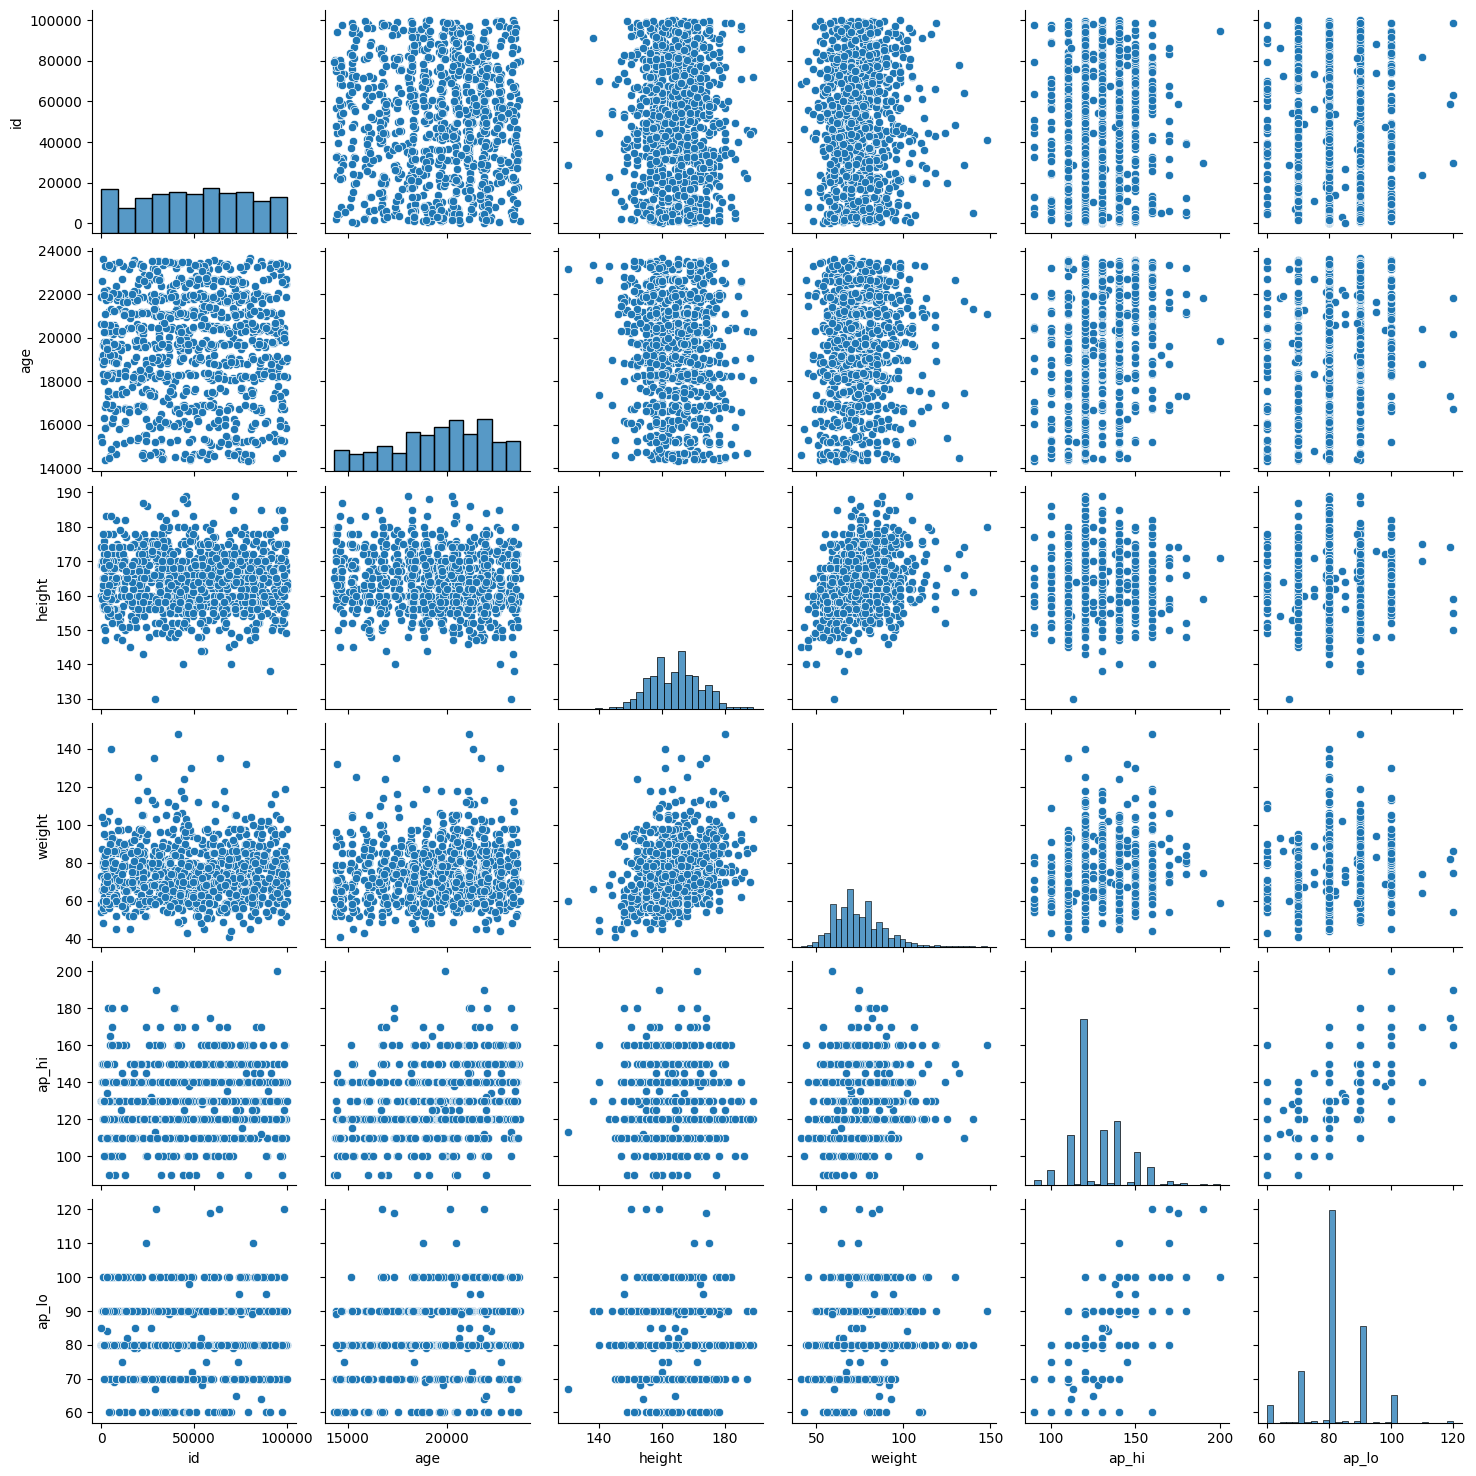

In [32]:
sns.pairplot(data.sample(1000), diag_kind='hist')
pass

Как мне кажется теперь диаграмы рассеивания выглядят более "презентабельно". Уже можно рассмотреть некоторые зависимости, к примеру, зависимость роста от веса.

## 3. Обучающая и тестовая выборки


Разделим общую выборку на обучающую и тестовую.

In [33]:
X = data.drop(['cardio','id'], axis=1)
y = data['cardio']

25%- тестовая, 75%-обучающая:

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(51121, 17041)

Проверим на пропущенные значения(их быть не должно):

In [35]:
X_test.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [36]:
X_train.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

##Масштабирование количественных признаков.

Стандартизируем количественные признаки, так как они принимают у нас сильно отличающиеся друг от друга значения(например, возраст указывается в тысячах(10000-20000), давление и рост же меняются от 90 до 200).

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)

In [38]:
X_test.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04,1.704100e+04
mean,2.877029e-16,-1.972224e-16,1.212105e-15,1.111200e-16,4.044519e-17,-4.936815e-16,1.125794e-16,1.344698e-16,-3.419078e-17,-4.180031e-17,-3.752646e-17
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.106412e+00,-7.246090e-01,-5.654486e+00,-2.435707e+00,-2.217580e+00,-2.280365e+00,-5.407411e-01,-3.955539e-01,-3.031202e-01,-2.344660e-01,-2.040573e+00
25%,-6.194365e-01,-7.246090e-01,-6.799405e-01,-6.415425e-01,-4.012963e-01,-1.420679e-01,-5.407411e-01,-3.955539e-01,-3.031202e-01,-2.344660e-01,4.900584e-01
50%,8.761956e-02,-7.246090e-01,8.537429e-02,-1.391765e-01,-4.012963e-01,-1.420679e-01,-5.407411e-01,-3.955539e-01,-3.031202e-01,-2.344660e-01,4.900584e-01
75%,7.458290e-01,1.380055e+00,7.231366e-01,5.784892e-01,8.095596e-01,9.270805e-01,9.258782e-01,-3.955539e-01,-3.031202e-01,-2.344660e-01,4.900584e-01
max,1.713808e+00,1.380055e+00,3.274186e+00,5.315083e+00,5.652983e+00,4.134526e+00,2.392498e+00,3.078104e+00,3.299021e+00,4.265011e+00,4.900584e-01


##kNN


In [39]:
y_test

42309    0
48599    0
63640    1
64152    0
43838    0
        ..
10854    0
14525    1
48356    0
59141    1
41442    0
Name: cardio, Length: 17041, dtype: category
Categories (2, int64): [0, 1]

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.28407957279502377

In [42]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[6749 1890]
 [2951 5451]]


In [43]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.272510304673074 55


In [44]:
knn = KNeighborsClassifier(n_neighbors = 55).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2636489896520021 0.27152162431782173


## Random forest

In [45]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score
rf = ensemble.RandomForestClassifier()

In [46]:
grid = GridSearchCV(rf, cv=5, param_grid = {'max_depth': [3, 6, 9],
    'min_samples_leaf': [3, 6, 9]},scoring='roc_auc',verbose = 2)

In [47]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   2.3s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   1.9s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.5s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.5s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.6s
[CV] END ....................max_depth=3, min_samples_leaf=9; total time=   2.3s
[CV] END ....................max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [3, 6, 9]},
             scoring='roc_auc', verbose=2)

In [48]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 6}

In [49]:
rfst = ensemble.RandomForestClassifier(max_depth = grid.best_params_['max_depth'],min_samples_leaf = grid.best_params_['min_samples_leaf'])
rfst.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=6)

In [50]:
accuracy_score(y_train, rfst.predict(X_train))

0.7440190919582951

In [51]:
accuracy_score(y_test, rfst.predict(X_test))

0.7300041077401561

In [52]:
err_train = np.mean(y_train != rfst.predict(X_train))
err_test  = np.mean(y_test  != rfst.predict(X_test))

print(err_train, err_test)

0.255980908041705 0.2699958922598439


In [53]:
print(confusion_matrix(y_test, y_test_predict))

[[6749 1890]
 [2951 5451]]


Как видно, точность предсказывания не сильно отличается от knn. Перейдем к нейронным сетям.

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay

Создадим модель, установим парамемтры максимального количества итераци, и обучения на всех ядрах.

In [55]:
model = LogisticRegression(max_iter=100, n_jobs=-1)

In [56]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [57]:
accuracy_score(y_train, model.predict(X_train))

0.7276657342383757

In [58]:
accuracy_score(y_test, model.predict(X_test))

0.7256616395751423

In [59]:
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print(err_train, err_test)

0.2723342657616244 0.2743383604248577


Попробую убрать ограничение на итерации.

In [60]:
model1 = LogisticRegression( n_jobs=-1)
model1.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [61]:
accuracy_score(y_train, model1.predict(X_train))

0.7276657342383757

In [62]:
accuracy_score(y_test, model1.predict(X_test))

0.7256616395751423

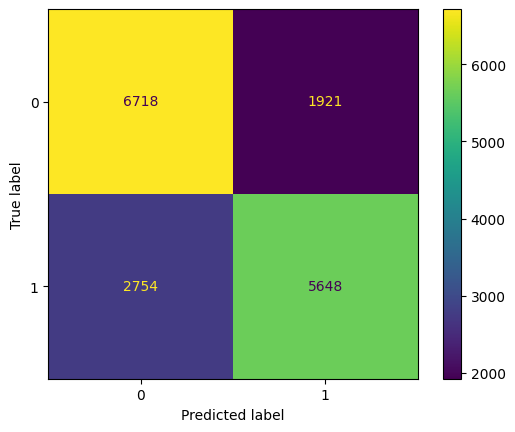

In [63]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()

## MLP


Создадим модель уже полноценной нейронной сети.

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
model = MLPClassifier(hidden_layer_sizes=(70, 50, 20),solver='adam',
    activation='relu',
    random_state=42)

Создали двухслойную нейронную сеть, на первом слое 70 нейронов, на втором 50, на третьем 20, далее из 20 переход в логистическую регрессию.

In [66]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(70, 50, 20), random_state=42)

In [67]:
accuracy_score(y_train, model.predict(X_train))

0.7690968486531954

In [68]:
accuracy_score(y_test, model.predict(X_test))

0.714688105158148

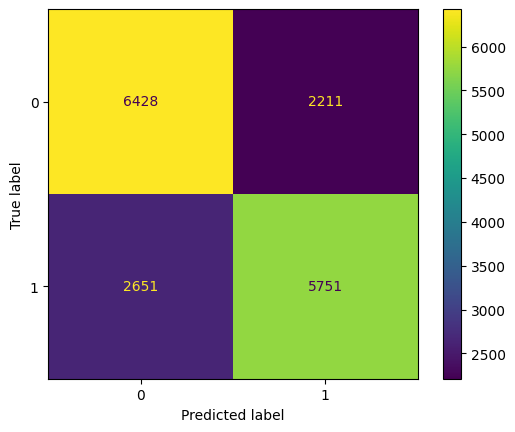

In [69]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()

Расмотрим зависимость ошибки от параметра альфа и числа нейронов на одном из слоев.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


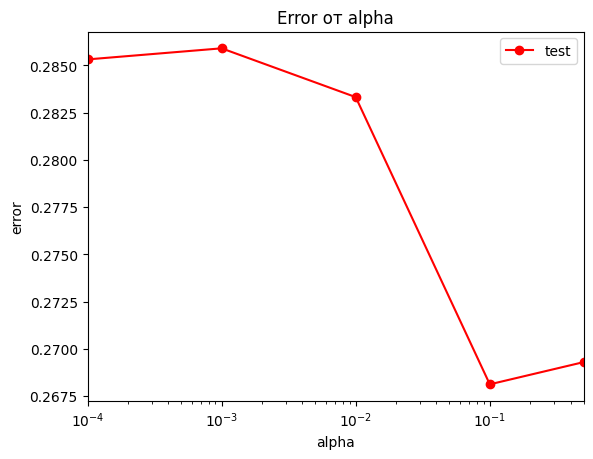

In [70]:
test_err = []
alpha = [0.0001, 0.001, 0.01, 0.1, 0.5]

for x in alpha:
  model = MLPClassifier(hidden_layer_sizes=(70, 50, 20),solver='adam',
                        activation='relu',
                        random_state=42,
                        alpha=x)
  model.fit(X_train, y_train)
  test_err.append(np.mean(y_test != model.predict(X_test)))

plt.semilogx(alpha, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha), np.max(alpha)])
plt.title('Error от alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()


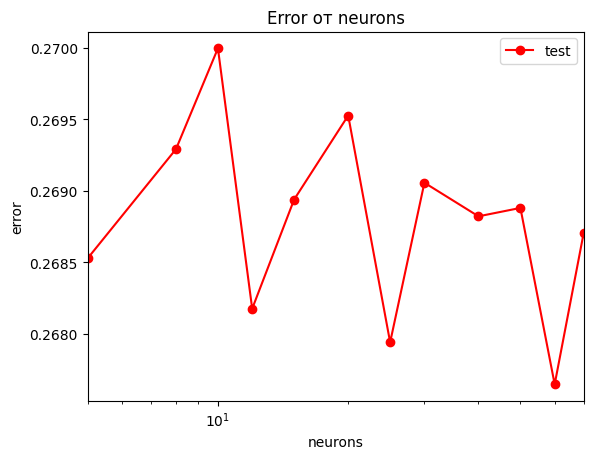

In [72]:
test_err = []

neurons = [5, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70]

for n in neurons:
  model = MLPClassifier(hidden_layer_sizes=(70, n),solver='adam',
                        activation='relu',
                        random_state=42,
                        alpha=x)
  model.fit(X_train, y_train)
  test_err.append(np.mean(y_test != model.predict(X_test)))

plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Error от neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()